# Words Preprocessing

* [Tokenization](#Tokenization)
    * [Sentences](#Sentences)
    * [Words](#Words)
* [Normalization](#Normalization)
* [Lemmatization](#Lemmatization)
* [Stemming](#Stemming)
* [N-grams](#N-grams)
    * [Spelling Recomender](#Spelling-Recomender)
    * [Spell Correction : TextBlob](#Spell-Correction-:-TextBlob)
    * [Predicting text](#Predicting-text)

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk import FreqDist
import gensim
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from nltk.corpus import words
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams
from nltk.metrics.distance  import edit_distance
from nltk.corpus import reuters
from nltk import bigrams, trigrams
from collections import Counter, defaultdict

In [2]:
#!pip install nltk
#!pip install gensim
#!pip install wordcloud
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('reuters')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anmarphy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anmarphy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /Users/anmarphy/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/anmarphy/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


True

The text was extracted from https://en.wikipedia.org/wiki/The_7_Habits_of_Highly_Effective_People

In [3]:
text='The 7 Habits of Highly Effective People, first published in 1989, is a business and self-help book written by \
 Stephen R. Covey.[1] Covey presents an approach to being effective in attaining goals by aligning oneself to what \
he calls "true north" principles based on a character ethic that he presents as universal and timeless.\
Covey defines effectiveness as the balance of obtaining desirable results with caring for that which produces \
those results. He illustrates this by referring to the fable of the goose that laid the golden eggs. He further \
claims that effectiveness can be expressed in terms of the P/PC ratio, where P refers to getting desired results \
and PC is caring for that which produces the results. \
Coveys best-known book has sold more than 25 million copies worldwide since its first publication. \
The audio version became the first non-fiction audio-book in U.S. publishing history to sell more than one million \
copies. Covey argues against what he calls "the personality ethic", that he sees as prevalent in many modern \
self-help books. He promotes what he labels "the character ethic": aligning ones values with so-called universal \
and timeless principles. In doing this, Covey distinguishes principles and values. He sees principles as external  \
natural laws, while values remain internal and subjective. Our values govern our behavior, while principles \
ultimately determine the consequences. Covey presents his teachings in a series of habits, manifesting \
as a progression from dependence through independence on to interdependence.'
print(text)

The 7 Habits of Highly Effective People, first published in 1989, is a business and self-help book written by  Stephen R. Covey.[1] Covey presents an approach to being effective in attaining goals by aligning oneself to what he calls "true north" principles based on a character ethic that he presents as universal and timeless.Covey defines effectiveness as the balance of obtaining desirable results with caring for that which produces those results. He illustrates this by referring to the fable of the goose that laid the golden eggs. He further claims that effectiveness can be expressed in terms of the P/PC ratio, where P refers to getting desired results and PC is caring for that which produces the results. Coveys best-known book has sold more than 25 million copies worldwide since its first publication. The audio version became the first non-fiction audio-book in U.S. publishing history to sell more than one million copies. Covey argues against what he calls "the personality ethic", t

## Tokenization

Tokenization breaks the raw text into tokens, those can be sentences, words or any pre defined pattern.

#### Sentences

In [4]:
sentences=sent_tokenize(text)
sentences

['The 7 Habits of Highly Effective People, first published in 1989, is a business and self-help book written by  Stephen R.',
 'Covey.',
 '[1] Covey presents an approach to being effective in attaining goals by aligning oneself to what he calls "true north" principles based on a character ethic that he presents as universal and timeless.Covey defines effectiveness as the balance of obtaining desirable results with caring for that which produces those results.',
 'He illustrates this by referring to the fable of the goose that laid the golden eggs.',
 'He further claims that effectiveness can be expressed in terms of the P/PC ratio, where P refers to getting desired results and PC is caring for that which produces the results.',
 'Coveys best-known book has sold more than 25 million copies worldwide since its first publication.',
 'The audio version became the first non-fiction audio-book in U.S. publishing history to sell more than one million copies.',
 'Covey argues against what he c

In [5]:
len(sentences)

13

In [6]:
token_sent= (len(nltk.word_tokenize(x)) for x in sentences)
print('The average number of tokens by sentence is:', np.round( sum(token_sent)/len(sentences),2))

The average number of tokens by sentence is: 20.85


#### Words

In [7]:
words=word_tokenize(text)
words[0:10]

['The',
 '7',
 'Habits',
 'of',
 'Highly',
 'Effective',
 'People',
 ',',
 'first',
 'published']

## Normalization

#### Lower case

In [8]:
tokens=[word.lower() for word in words]
tokens[0:10]

['the',
 '7',
 'habits',
 'of',
 'highly',
 'effective',
 'people',
 ',',
 'first',
 'published']

#### Removing Noise: Special characters

In [9]:
tokens = [re.sub(r'[.,"]', '',token) for token in tokens] # ., and " replaced with '' 
print(tokens)

['the', '7', 'habits', 'of', 'highly', 'effective', 'people', '', 'first', 'published', 'in', '1989', '', 'is', 'a', 'business', 'and', 'self-help', 'book', 'written', 'by', 'stephen', 'r', '', 'covey', '', '[', '1', ']', 'covey', 'presents', 'an', 'approach', 'to', 'being', 'effective', 'in', 'attaining', 'goals', 'by', 'aligning', 'oneself', 'to', 'what', 'he', 'calls', '``', 'true', 'north', "''", 'principles', 'based', 'on', 'a', 'character', 'ethic', 'that', 'he', 'presents', 'as', 'universal', 'and', 'timelesscovey', 'defines', 'effectiveness', 'as', 'the', 'balance', 'of', 'obtaining', 'desirable', 'results', 'with', 'caring', 'for', 'that', 'which', 'produces', 'those', 'results', '', 'he', 'illustrates', 'this', 'by', 'referring', 'to', 'the', 'fable', 'of', 'the', 'goose', 'that', 'laid', 'the', 'golden', 'eggs', '', 'he', 'further', 'claims', 'that', 'effectiveness', 'can', 'be', 'expressed', 'in', 'terms', 'of', 'the', 'p/pc', 'ratio', '', 'where', 'p', 'refers', 'to', 'get

#### Removing words shorter than 4 char

In [10]:
tokens_4 = []
for token in tokens:
    if len(token) > 3:
        tokens_4.append(token)
tokens = tokens_4

print(tokens)

['habits', 'highly', 'effective', 'people', 'first', 'published', '1989', 'business', 'self-help', 'book', 'written', 'stephen', 'covey', 'covey', 'presents', 'approach', 'being', 'effective', 'attaining', 'goals', 'aligning', 'oneself', 'what', 'calls', 'true', 'north', 'principles', 'based', 'character', 'ethic', 'that', 'presents', 'universal', 'timelesscovey', 'defines', 'effectiveness', 'balance', 'obtaining', 'desirable', 'results', 'with', 'caring', 'that', 'which', 'produces', 'those', 'results', 'illustrates', 'this', 'referring', 'fable', 'goose', 'that', 'laid', 'golden', 'eggs', 'further', 'claims', 'that', 'effectiveness', 'expressed', 'terms', 'p/pc', 'ratio', 'where', 'refers', 'getting', 'desired', 'results', 'caring', 'that', 'which', 'produces', 'results', 'coveys', 'best-known', 'book', 'sold', 'more', 'than', 'million', 'copies', 'worldwide', 'since', 'first', 'publication', 'audio', 'version', 'became', 'first', 'non-fiction', 'audio-book', 'publishing', 'history',

#### Stop words

In [11]:
stopWords = set(stopwords.words('english'))

In [12]:
tokens_n_e = []

for token in tokens:
    if token not in stopWords:
        tokens_n_e.append(token)

tokens = tokens_n_e
print(tokens)

['habits', 'highly', 'effective', 'people', 'first', 'published', '1989', 'business', 'self-help', 'book', 'written', 'stephen', 'covey', 'covey', 'presents', 'approach', 'effective', 'attaining', 'goals', 'aligning', 'oneself', 'calls', 'true', 'north', 'principles', 'based', 'character', 'ethic', 'presents', 'universal', 'timelesscovey', 'defines', 'effectiveness', 'balance', 'obtaining', 'desirable', 'results', 'caring', 'produces', 'results', 'illustrates', 'referring', 'fable', 'goose', 'laid', 'golden', 'eggs', 'claims', 'effectiveness', 'expressed', 'terms', 'p/pc', 'ratio', 'refers', 'getting', 'desired', 'results', 'caring', 'produces', 'results', 'coveys', 'best-known', 'book', 'sold', 'million', 'copies', 'worldwide', 'since', 'first', 'publication', 'audio', 'version', 'became', 'first', 'non-fiction', 'audio-book', 'publishing', 'history', 'sell', 'million', 'copies', 'covey', 'argues', 'calls', 'personality', 'ethic', 'sees', 'prevalent', 'many', 'modern', 'self-help', 'b

In [13]:
f=FreqDist(tokens)
f

FreqDist({'covey': 5, 'principles': 5, 'results': 4, 'values': 4, 'first': 3, 'presents': 3, 'ethic': 3, 'habits': 2, 'effective': 2, 'self-help': 2, ...})

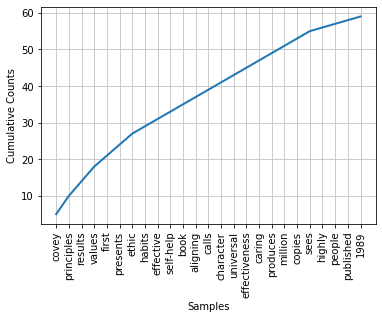

In [14]:
f.plot(25, cumulative=True)
plt.show()

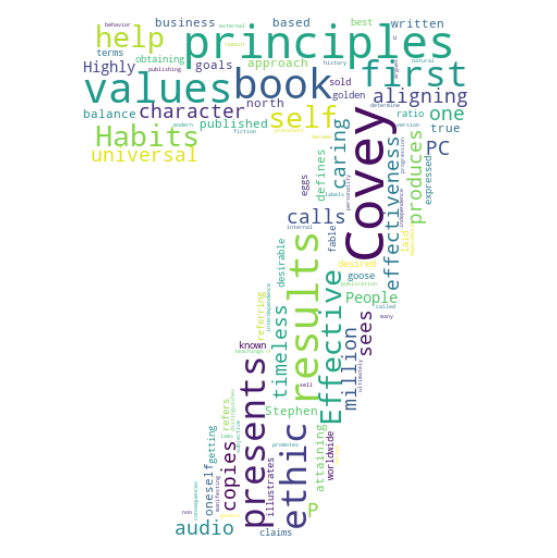

In [15]:
custom_mask = np.array(Image.open("7_pic.jpeg"))
wc = WordCloud(background_color="white", mask=custom_mask)
wc.generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Lemmatization 
#### (Morphologic analysis)

It is used to group different forms of the word through their Lemma (root word)

In [16]:
lemmatizer = WordNetLemmatizer() 
  
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 
print("better :", lemmatizer.lemmatize("better", pos ="a")) ## a denotes adj in 'pos'

rocks : rock
corpora : corpus
better : good


#### Verbs

In [17]:
lemma_text =[]
for token in tokens:
    lemma_text.append(WordNetLemmatizer().lemmatize(token, pos='v'))

print('Original: \n ', tokens)
print('\n')
print('Lemmatization Verbs: \n ',lemma_text)

Original: 
  ['habits', 'highly', 'effective', 'people', 'first', 'published', '1989', 'business', 'self-help', 'book', 'written', 'stephen', 'covey', 'covey', 'presents', 'approach', 'effective', 'attaining', 'goals', 'aligning', 'oneself', 'calls', 'true', 'north', 'principles', 'based', 'character', 'ethic', 'presents', 'universal', 'timelesscovey', 'defines', 'effectiveness', 'balance', 'obtaining', 'desirable', 'results', 'caring', 'produces', 'results', 'illustrates', 'referring', 'fable', 'goose', 'laid', 'golden', 'eggs', 'claims', 'effectiveness', 'expressed', 'terms', 'p/pc', 'ratio', 'refers', 'getting', 'desired', 'results', 'caring', 'produces', 'results', 'coveys', 'best-known', 'book', 'sold', 'million', 'copies', 'worldwide', 'since', 'first', 'publication', 'audio', 'version', 'became', 'first', 'non-fiction', 'audio-book', 'publishing', 'history', 'sell', 'million', 'copies', 'covey', 'argues', 'calls', 'personality', 'ethic', 'sees', 'prevalent', 'many', 'modern', 's

#### Nouns

In [18]:
for i in range(len(lemma_text )):
    lemma_text[i] = WordNetLemmatizer().lemmatize(lemma_text[i], pos='n')
print(lemma_text)

['habit', 'highly', 'effective', 'people', 'first', 'publish', '1989', 'business', 'self-help', 'book', 'write', 'stephen', 'covey', 'covey', 'present', 'approach', 'effective', 'attain', 'goal', 'align', 'oneself', 'call', 'true', 'north', 'principle', 'base', 'character', 'ethic', 'present', 'universal', 'timelesscovey', 'define', 'effectiveness', 'balance', 'obtain', 'desirable', 'result', 'care', 'produce', 'result', 'illustrate', 'refer', 'fable', 'goose', 'lay', 'golden', 'egg', 'claim', 'effectiveness', 'express', 'term', 'p/pc', 'ratio', 'refer', 'get', 'desire', 'result', 'care', 'produce', 'result', 'covey', 'best-known', 'book', 'sell', 'million', 'copy', 'worldwide', 'since', 'first', 'publication', 'audio', 'version', 'become', 'first', 'non-fiction', 'audio-book', 'publish', 'history', 'sell', 'million', 'copy', 'covey', 'argue', 'call', 'personality', 'ethic', 'see', 'prevalent', 'many', 'modern', 'self-help', 'book', 'promote', 'label', 'character', 'ethic', 'align', 'o

## Stemming

In [19]:
from nltk.stem import PorterStemmer ## Most common English stemmer
ps = PorterStemmer()

for i in range(len(lemma_text)):
    lemma_text[i] = ps.stem(lemma_text[i])
print(lemma_text)

['habit', 'highli', 'effect', 'peopl', 'first', 'publish', '1989', 'busi', 'self-help', 'book', 'write', 'stephen', 'covey', 'covey', 'present', 'approach', 'effect', 'attain', 'goal', 'align', 'oneself', 'call', 'true', 'north', 'principl', 'base', 'charact', 'ethic', 'present', 'univers', 'timelesscovey', 'defin', 'effect', 'balanc', 'obtain', 'desir', 'result', 'care', 'produc', 'result', 'illustr', 'refer', 'fabl', 'goos', 'lay', 'golden', 'egg', 'claim', 'effect', 'express', 'term', 'p/pc', 'ratio', 'refer', 'get', 'desir', 'result', 'care', 'produc', 'result', 'covey', 'best-known', 'book', 'sell', 'million', 'copi', 'worldwid', 'sinc', 'first', 'public', 'audio', 'version', 'becom', 'first', 'non-fict', 'audio-book', 'publish', 'histori', 'sell', 'million', 'copi', 'covey', 'argu', 'call', 'person', 'ethic', 'see', 'preval', 'mani', 'modern', 'self-help', 'book', 'promot', 'label', 'charact', 'ethic', 'align', 'one', 'valu', 'so-cal', 'univers', 'timeless', 'principl', 'covey', 

## N grams.
### Spelling Recomender

Autocorrect based on Jaccard distance: For every misspelled word, the recommender'd find the word with the shortest distance and starts with the same letter as the misspelled word.

In [21]:
from nltk.corpus import words
correct_spellings = words.words()
gram_numbers=[2,4]
entries=['spleling', 'mispelling', 'reccomender', 'cormulent']
for gram_number in gram_numbers:
    for entry in entries:
        temp = [(jaccard_distance(set(ngrams(entry, gram_number)), set(ngrams(w, gram_number))),w) for w in correct_spellings if w[0]==entry[0]]
        print(sorted(temp, key = lambda val:val[0])[0][1])
    print('\n')

spelling
misspelling
recommender
corpulent


shieling
misspelling
recco
cormus




The Edit distance between two words is the minimum number of operations (consisting of insertions, deletions or substitutions of a single character, or transposition of two adjacent characters) required to change one word into the other.

In [ ]:
def edit_dist_autcorrector(entries=entries):
    
    outcomes = []
    for entry in entries:
        distances = ((edit_distance(entry, word), word) for word in correct_spellings)
        closest = min(distances)
        outcomes.append(closest[1])
    return outcomes
    
edit_dist_autcorrector()

### Spell Correction : TextBlob

In [ ]:
from textblob import TextBlob
entries=['spleling', 'mispelling', 'reccomender', 'cormulent']
for word in entries:
    output=TextBlob(word).correct()
    print(output)

## Predicting text

Another application of n_grams is for predicting text. And it is combined with DL to generate text in Chatbots.

In [ ]:
# code courtesy of https://nlpforhackers.io/language-models/
model = defaultdict(lambda: defaultdict(lambda: 0))
for sentence in reuters.sents():
    for w1, w2, w3 in trigrams(sentence, pad_right=True, pad_left=True):
        model[(w1, w2)][w3] += 1
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count

In [ ]:
model['the', 'country']

## References
* https://textblob.readthedocs.io/en/dev/quickstart.html
* https://nlpforhackers.io/language-models/
* http://www.nltk.org